<a href="https://colab.research.google.com/github/IA2122/practica-4-paochoa/blob/main/practica4_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 4 Parte II. Clustering jerárquico en sklearn

Antes de empezar a ver cómo funciona el clustering jerárquico en la librería sklearn, vamos a fijar la notación:
- Tenemos n instancias con m descriptores cada una, almacenadas en X
- Llamaremos Z al vector que contiene la información de enlazamiento

El proceso de clústering jerárquico en sklearn consta de dos partes. En la primera se calcula el dendograma para ver cuántos clústeres hay en el dataset. En la segunda se lleva a cabo el proceso de clustering.

## Generando el dendograma

Comenzamos importando las librerías que vamos a utilizar.

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np
%matplotlib inline

A continuación vamos a generar los datos de nuestra muestra. Como existe una componente aleatoria a la hora de generar la muestra, vamos a fijar la semilla para poder reproducir los resultados

In [ ]:
np.random.seed(4711)

Vamos a generar dos clusters: el clúster a con 100 puntos y el clúster b con 50. Generamos 100 puntos aleatorios siguiendo una distribución normal. El primer valor que le pasamos ([10,0]) indica la coordenada donde es más probable que se generen los puntos de la muestra. El siguiente valor ([[3, 1], [1, 4]]) indica la covarianza. Más información sobre esta manera de generar puntos aleatorios viene descrita en https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html

In [ ]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])

Generamos 50 puntos aleatorios siguiendo una distribución normal

In [ ]:
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])

Concatenamos ambos datasets.

In [ ]:
X = np.concatenate((a, b),)

Veamos el dataset que hemos generado

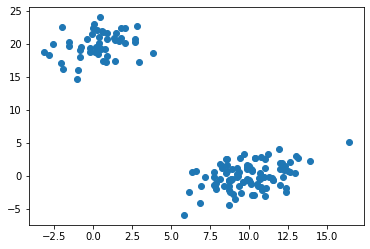

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show()

Veámos ahora como se realiza el clustering jerárquico. El primer paso consiste en definir el enlazado. En este caso utilizaremos ward como método de enlazado. Además de ward se pueden utilizar los valores 'single', 'complete', y 'average'.

In [ ]:
Z = linkage(X,'ward')

Veámos ahora el dendograma que se genera utilizando el enlazado de Ward. 

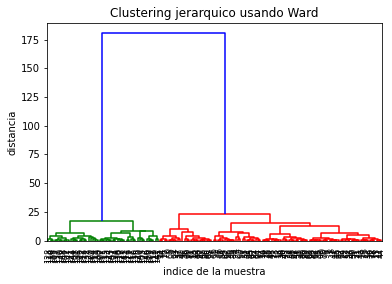

In [ ]:
plt.title('Clustering jerarquico usando Ward')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

***
### Ejercicio 
Utilizando los datos almacenados en X, genera los dendrogramas utilizando los métodos de enlazado 'single', 'complete', y 'average'.



In [ ]:
# La diferencia entre estos métodos de clustering y los otro (KMeans, DBScan,..) es la forma en la que se construyen. 
# Estos se van construyendo como se forman los dendogramas, a pares, por eso es posible luego representarlos de esa forma. 
# Sin embargo, los otros no se crean así, por lo que no pueden ser representados de esa forma)
# Que la distancia sea mayor o menor no indica que sea mejor o peor el método (no hay nada que indique si son mejor o peor)
# Sólo es que usan medidas distintas para calcular la distancia

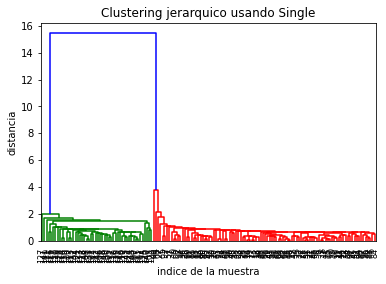

In [ ]:
S = linkage(X,'single')
plt.title('Clustering jerarquico usando Single')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
dendrogram(
    S,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

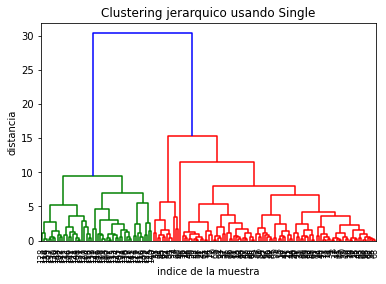

In [ ]:
C = linkage(X,'complete')
plt.title('Clustering jerarquico usando Single')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
dendrogram(
    C,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

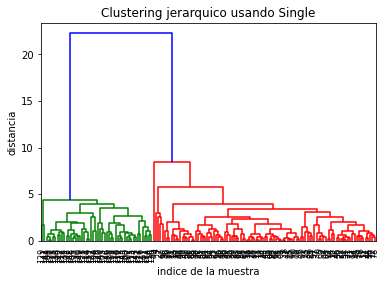

In [ ]:
A = linkage(X,'average')
plt.title('Clustering jerarquico usando Single')
plt.xlabel('indice de la muestra')
plt.ylabel('distancia')
dendrogram(
    A,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

***

## Construyendo los clústeres

Pasamos ahora a construir los clústeres. En el dendograma generado utilizando Ward, hemos visto que hay claramente dos clústeres, por lo que podemos pasar a utilizar el clústering jerárquico para agrupar los puntos. Para ello debemos construir una instancia de la clase ```AgglomerativeClustering``` a la cual le pasamos el método de enlazado y el número de clústeres.

In [ ]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=2)

Ahora podemos agrupar los clústeres usando el método fit como vimos con los otros algoritmos de clustering.

In [ ]:
clusters = clustering.fit(X)
labels = clusters.labels_

Finalmente, el siguiente código nos sirve para visualizar los clústeres. 

In [ ]:
def plot_clusters(X,labels):
    colors = cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))
    for i,l in enumerate(np.unique(labels)):
        Y = np.array([list(X[j]) for j,a in enumerate(labels) if a == l])
        plt.scatter(Y[:,0], Y[:,1],color=colors[i])
    plt.show()    

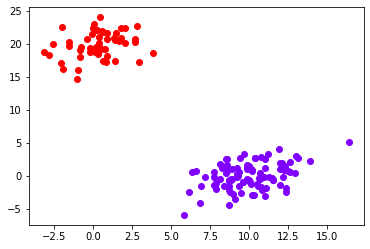

In [ ]:
plot_clusters(X,labels)

### Ejercicio

¿Se obtienen los mismos resultados si utilizamos los otros enlazados?

Respuesta: Sí

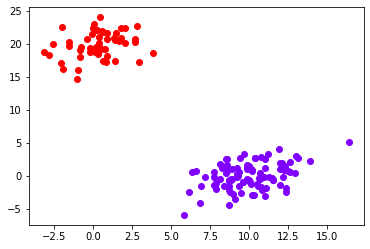

In [ ]:
clusteringS = AgglomerativeClustering(linkage='single', n_clusters=2)
clustersS = clusteringS.fit(X)
labelsS = clustersS.labels_
plot_clusters(X,labelsS)

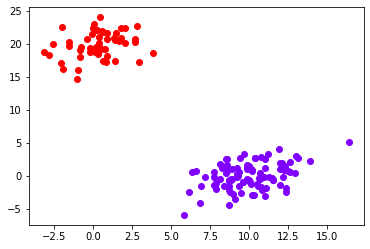

In [ ]:
clusteringC = AgglomerativeClustering(linkage='complete', n_clusters=2)
clustersC = clusteringC.fit(X)
labelsC = clustersC.labels_
plot_clusters(X,labelsC)

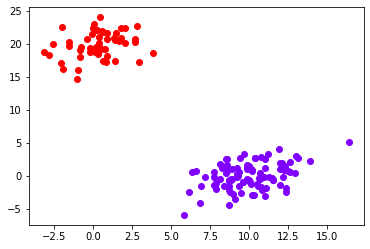

In [ ]:
clusteringA = AgglomerativeClustering(linkage='average', n_clusters=2)
clustersA = clusteringA.fit(X)
labelsA = clustersA.labels_
plot_clusters(X,labelsA)

*** 

### Ejercicio 

Repite lo que hemos hecho hasta ahora para el dataset de iris que vimos en la práctica anterior. Debido a que en el dataset iris, las instancias se representan con 4 descriptores, no será posible visualizar los clústeres con la función ```plot_clusters```. 

In [ ]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv -O iris.csv

--2022-03-16 15:23:59--  https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606 (4.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2022-03-16 15:24:00 (33.0 MB/s) - ‘iris.csv’ saved [4606/4606]



In [ ]:
import pandas as pd
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
clusteringIW = AgglomerativeClustering(linkage='ward', n_clusters=3)
clustersIW = clusteringIW.fit(X)
labelsIW = clustersC.labels_
labelsIW

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
clusteringIS = AgglomerativeClustering(linkage='single', n_clusters=3)
clustersIS = clusteringIS.fit(X)
labelsIS = clustersIS.labels_
labelsIS

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
clusteringIC = AgglomerativeClustering(linkage='complete', n_clusters=3)
clustersIC = clusteringIC.fit(X)
labelsIC = clustersIC.labels_
labelsIC

array([0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
clusteringIA = AgglomerativeClustering(linkage='average', n_clusters=3)
clustersIA = clusteringIA.fit(X)
labelsIA = clustersIA.labels_
labelsIA

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

***

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save File in GitHub..." del menú File.